In [4]:
import os
import pandas as pd
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
from datetime import timedelta
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import lightgbm as lightgbm
import xgboost as xgb
from sklearn.metrics import mean_squared_error

data = pd.read_csv("completedata.csv")
data['BASELINE'] = data[['workplaces_percent_change_from_baseline_day_7',
                     'workplaces_percent_change_from_baseline_day_8',
                     'workplaces_percent_change_from_baseline_day_9',
                     'workplaces_percent_change_from_baseline_day_10',
                     'workplaces_percent_change_from_baseline_day_11',
                     'workplaces_percent_change_from_baseline_day_12',
                     'workplaces_percent_change_from_baseline_day_13']].mean(axis=1)
train_features = data[data['category']=='train'].iloc[:,0:-7]
train_labels = data[data['category']=='train'].iloc[:,-6:-1]
validation1_features = data[data['category']=='validation 1'].iloc[:,0:-7]
validation1_labels = data[data['category']=='validation 1'].iloc[:,-6:-1]
validation2_features = data[data['category']=='validation 2'].iloc[:,0:-7]
validation2_labels = data[data['category']=='validation 2'].iloc[:,-6:-1]
baseline_validation1 = data[data['category']=='validation 1']
baseline_validation2 = data[data['category']=='validation 1']

#pip = Pipeline([('std_scaler', StandardScaler())])
pip = Pipeline([('minmax_scaler', MinMaxScaler())])
featureNames = train_features.columns
predictingLabels = validation1_labels.columns
display([col for col in featureNames])
#display([col for col in predictingLabels])
#display(data[['BASELINE','baseline_workplaces_percent_change_from_baseline']])


['Cases inz_entries 0 - 9_14_dayMean',
 'Cases inz_entries 10 - 19_14_dayMean',
 'Cases inz_entries 20 - 29_14_dayMean',
 'Cases inz_entries 30 - 39_14_dayMean',
 'Cases inz_entries 40 - 49_14_dayMean',
 'Cases inz_entries 50 - 59_14_dayMean',
 'Cases inz_entries 60 - 69_14_dayMean',
 'Cases inz_entries 70 - 79_14_dayMean',
 'Cases inz_entries 80+_14_dayMean',
 'Cases inzsumTotal 0 - 9_14_dayMean',
 'Cases inzsumTotal 10 - 19_14_dayMean',
 'Cases inzsumTotal 20 - 29_14_dayMean',
 'Cases inzsumTotal 30 - 39_14_dayMean',
 'Cases inzsumTotal 40 - 49_14_dayMean',
 'Cases inzsumTotal 50 - 59_14_dayMean',
 'Cases inzsumTotal 60 - 69_14_dayMean',
 'Cases inzsumTotal 70 - 79_14_dayMean',
 'Cases inzsumTotal 80+_14_dayMean',
 'Death inz_entries 0 - 9_14_dayMean',
 'Death inz_entries 10 - 19_14_dayMean',
 'Death inz_entries 20 - 29_14_dayMean',
 'Death inz_entries 30 - 39_14_dayMean',
 'Death inz_entries 40 - 49_14_dayMean',
 'Death inz_entries 50 - 59_14_dayMean',
 'Death inz_entries 60 - 69_14

In [24]:
start = time.time()

'''
featuresSelection = ['baseline_workplaces_percent_change_from_baseline',
                     'workplaces_percent_change_from_baseline_day_7',
                     'workplaces_percent_change_from_baseline_day_8',
                     'workplaces_percent_change_from_baseline_day_9',
                     'workplaces_percent_change_from_baseline_day_10',
                     'workplaces_percent_change_from_baseline_day_11',
                     'workplaces_percent_change_from_baseline_day_12',
                     'workplaces_percent_change_from_baseline_day_13']
featuresSelection = train_features.columns
label = 'workplaces_percent_change_from_baseline'
'''
 

 

featuresSelection = ['baseline_testPositvity','case_inzsumTotal_14_dayMean','test_inz_entries_14_dayMean',
                     'test_inzsumTotal_14_dayMean','testPositvity_14_dayMean',
                     'retail_and_recreation_percent_change_from_baseline_14_dayMean',
                     'grocery_and_pharmacy_percent_change_from_baseline_14_dayMean',
                     'parks_percent_change_from_baseline_14_dayMean',
                     'transit_stations_percent_change_from_baseline_14_dayMean',
                     'workplaces_percent_change_from_baseline_14_dayMean',
                     'residential_percent_change_from_baseline_14_dayMean',
                     'meanNeighborIncidence_14_dayMean',
                     'maxNeighborIncidence_14_dayMean',
                     'kofStrigency_14_dayMean',
                     'case_inz_entries_14_dayMean']
label = 'testPositvity'


display("---Ridge---"+label+"---")
for alpha in [1,10,100,1000]:
    reg = linear_model.Ridge(alpha=alpha)
    display(reg)
    reg.fit(pip.fit_transform(train_features[featuresSelection].values), train_labels[[label]])
    predictions_valid1 = reg.predict(pip.fit_transform(validation1_features[featuresSelection].values))
    predictions_valid2 = reg.predict(pip.fit_transform(validation2_features[featuresSelection].values))
    rmse1 = np.sqrt(mean_squared_error(predictions_valid1, validation1_labels[[label]]))
    rmse2 = np.sqrt(mean_squared_error(predictions_valid2, validation2_labels[[label]]))
    baseline_rmse1 = np.sqrt(mean_squared_error(validation1_features[["baseline_"+label]],validation1_labels[[label]]))
    baseline_rmse2 = np.sqrt(mean_squared_error(validation2_features[["baseline_"+label]],validation2_labels[[label]]))
    display("Baseline RMSE validation set 1: "+str(baseline_rmse1))
    display("Model RMSE validation set 1: "+str(rmse1))
    display("Baseline RMSE validation set 2: "+str(baseline_rmse2))
    display("Model RMSE validation set 2: "+str(rmse2))
    display(pd.DataFrame(reg.coef_.transpose(), index=featuresSelection, columns=['coefficients']).sort_values(['coefficients'], ascending=False))   
    
display("----------End of evaluating (%s)----------" % (time.time() - start))


'---Ridge---testPositvity---'

Ridge(alpha=1)

'Baseline RMSE validation set 1: 0.014392503751041912'

'Model RMSE validation set 1: 0.12621917288049897'

'Baseline RMSE validation set 2: 0.045367066627572394'

'Model RMSE validation set 2: 0.05448782587056962'

,coefficients
baseline_testPositvity,0.349167
testPositvity_14_dayMean,0.125941
test_inzsumTotal_14_dayMean,0.099286
maxNeighborIncidence_14_dayMean,0.066002
retail_and_recreation_percent_change_from_baseline_14_dayMean,0.043948
workplaces_percent_change_from_baseline_14_dayMean,0.020718
grocery_and_pharmacy_percent_change_from_baseline_14_dayMean,0.006405
residential_percent_change_from_baseline_14_dayMean,0.002043
case_inz_entries_14_dayMean,0.001287
test_inz_entries_14_dayMean,-0.008783


Ridge(alpha=10)

'Baseline RMSE validation set 1: 0.014392503751041912'

'Model RMSE validation set 1: 0.124644719728394'

'Baseline RMSE validation set 2: 0.045367066627572394'

'Model RMSE validation set 2: 0.05524616619071146'

,coefficients
baseline_testPositvity,0.265513
testPositvity_14_dayMean,0.172119
test_inzsumTotal_14_dayMean,0.063858
retail_and_recreation_percent_change_from_baseline_14_dayMean,0.043985
maxNeighborIncidence_14_dayMean,0.036635
workplaces_percent_change_from_baseline_14_dayMean,0.021969
case_inz_entries_14_dayMean,0.008674
test_inz_entries_14_dayMean,0.007326
residential_percent_change_from_baseline_14_dayMean,0.002344
grocery_and_pharmacy_percent_change_from_baseline_14_dayMean,0.001223


Ridge(alpha=100)

'Baseline RMSE validation set 1: 0.014392503751041912'

'Model RMSE validation set 1: 0.11789911592093562'

'Baseline RMSE validation set 2: 0.045367066627572394'

'Model RMSE validation set 2: 0.051834341712037026'

,coefficients
baseline_testPositvity,0.149259
testPositvity_14_dayMean,0.147922
case_inz_entries_14_dayMean,0.044915
maxNeighborIncidence_14_dayMean,0.041900
meanNeighborIncidence_14_dayMean,0.034246
retail_and_recreation_percent_change_from_baseline_14_dayMean,0.030279
workplaces_percent_change_from_baseline_14_dayMean,0.027629
test_inz_entries_14_dayMean,0.015146
test_inzsumTotal_14_dayMean,0.011798
residential_percent_change_from_baseline_14_dayMean,0.000540


Ridge(alpha=1000)

'Baseline RMSE validation set 1: 0.014392503751041912'

'Model RMSE validation set 1: 0.08225167211027296'

'Baseline RMSE validation set 2: 0.045367066627572394'

'Model RMSE validation set 2: 0.058472909635758775'

,coefficients
testPositvity_14_dayMean,0.056033
baseline_testPositvity,0.049478
maxNeighborIncidence_14_dayMean,0.032872
meanNeighborIncidence_14_dayMean,0.031686
case_inz_entries_14_dayMean,0.030114
test_inz_entries_14_dayMean,0.015034
workplaces_percent_change_from_baseline_14_dayMean,0.014467
retail_and_recreation_percent_change_from_baseline_14_dayMean,0.011589
test_inzsumTotal_14_dayMean,0.011373
case_inzsumTotal_14_dayMean,0.005831


'----------End of evaluating (0.13545680046081543)----------'

In [110]:
'''
cantonId = 'ZH'
pastOutput = pd.read_csv("data/outputs/"+cantonId+".csv")


predDf = pd.DataFrame()
for col in pastOutput.columns:
    p = predictors[col].predict(pip.fit_transform(pd.read_csv("data/newest/"+cantonId+".csv")))[0]
    temp = pd.DataFrame([p for i in range(7)], columns=[col+"_predictions"])
    predDf = pd.concat([predDf,temp], axis=1)
df = pastOutput.append(predDf, ignore_index=True)
for col in pastOutput.columns:
    df[[col]] = df[[col]].rolling(window=7).mean()
    df[[col,col+"_predictions"]].plot(kind='line', y=[col,col+"_predictions"], figsize=(20,10), xlabel='days', ylabel=col)
    plt.show()
'''

'\ncantonId = \'ZH\'\npastOutput = pd.read_csv("data/outputs/"+cantonId+".csv")\n\n\npredDf = pd.DataFrame()\nfor col in pastOutput.columns:\n    p = predictors[col].predict(pip.fit_transform(pd.read_csv("data/newest/"+cantonId+".csv")))[0]\n    temp = pd.DataFrame([p for i in range(7)], columns=[col+"_predictions"])\n    predDf = pd.concat([predDf,temp], axis=1)\ndf = pastOutput.append(predDf, ignore_index=True)\nfor col in pastOutput.columns:\n    df[[col]] = df[[col]].rolling(window=7).mean()\n    df[[col,col+"_predictions"]].plot(kind=\'line\', y=[col,col+"_predictions"], figsize=(20,10), xlabel=\'days\', ylabel=col)\n    plt.show()\n'

'---lightGBM---workplaces_percent_change_from_baseline---'

LGBMRegressor(reg_alpha=100)

'Baseline RMSE validation set 1: 4.921673003924303'

'Model RMSE validation set 1: 4.831809535529989'

'Baseline RMSE validation set 2: 10.615032028550798'

'Model RMSE validation set 2: 6.30375957313574'

<AxesSubplot:>

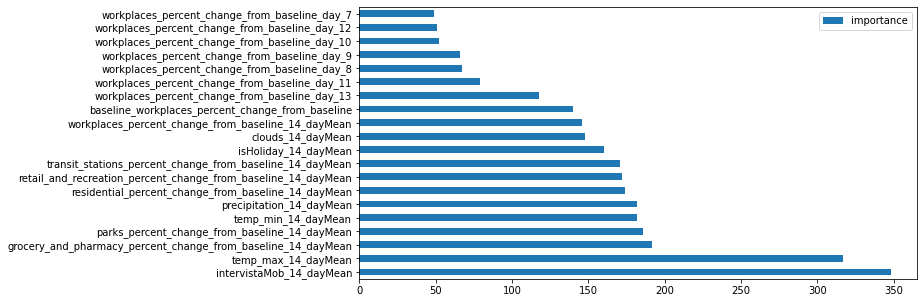

'----------End of evaluating (0.3777506351470947)----------'

In [8]:
start = time.time()

featuresSelection = ['baseline_workplaces_percent_change_from_baseline',
                     'workplaces_percent_change_from_baseline_day_7',
                     'workplaces_percent_change_from_baseline_day_8',
                     'workplaces_percent_change_from_baseline_day_9',
                     'workplaces_percent_change_from_baseline_day_10',
                     'workplaces_percent_change_from_baseline_day_11',
                     'workplaces_percent_change_from_baseline_day_12',
                     'workplaces_percent_change_from_baseline_day_13',
                     'isHoliday_14_dayMean',
                     'retail_and_recreation_percent_change_from_baseline_14_dayMean',
                     'grocery_and_pharmacy_percent_change_from_baseline_14_dayMean',
                     'parks_percent_change_from_baseline_14_dayMean',
                     'transit_stations_percent_change_from_baseline_14_dayMean',
                     'workplaces_percent_change_from_baseline_14_dayMean',
                     'residential_percent_change_from_baseline_14_dayMean',
                     'intervistaMob_14_dayMean',
                     'temp_min_14_dayMean',
                     'temp_max_14_dayMean',
                     'clouds_14_dayMean',
                     'precipitation_14_dayMean']

for label in ['workplaces_percent_change_from_baseline']:
    display("---lightGBM---"+label+"---")
    reg = lightgbm.LGBMRegressor(n_estimators=100, reg_alpha=100)
    display(reg)
    reg.fit(pip.fit_transform(train_features[featuresSelection].values), train_labels[label])
    predictions_valid1 = reg.predict(pip.fit_transform(validation1_features[featuresSelection].values))
    predictions_valid2 = reg.predict(pip.fit_transform(validation2_features[featuresSelection].values))
    rmse1 = np.sqrt(mean_squared_error(predictions_valid1, validation1_labels[[label]]))
    rmse2 = np.sqrt(mean_squared_error(predictions_valid2, validation2_labels[[label]]))
    baseline_rmse1 = np.sqrt(mean_squared_error(validation1_features[["baseline_"+label]],validation1_labels[[label]]))
    baseline_rmse2 = np.sqrt(mean_squared_error(validation2_features[["baseline_"+label]],validation2_labels[[label]]))
    display("Baseline RMSE validation set 1: "+str(baseline_rmse1))
    display("Model RMSE validation set 1: "+str(rmse1))
    display("Baseline RMSE validation set 2: "+str(baseline_rmse2))
    display("Model RMSE validation set 2: "+str(rmse2))
    df = pd.DataFrame(reg.feature_importances_, index=featuresSelection, columns=['importance']).sort_values(['importance'], ascending=False)
    display(df[df['importance'] > 0].iloc[0:30].plot(kind='barh', y='importance', figsize=(10,5)))  
    plt.show()
    
display("----------End of evaluating (%s)----------" % (time.time() - start))


'---XGBoost---testPositvity---'

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=200, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

'Baseline RMSE validation set 1: 0.014392503751041912'

'Model RMSE validation set 1: 0.1626603597496403'

'Baseline RMSE validation set 2: 0.045367066627572394'

'Model RMSE validation set 2: 0.07358187753526486'

<AxesSubplot:>

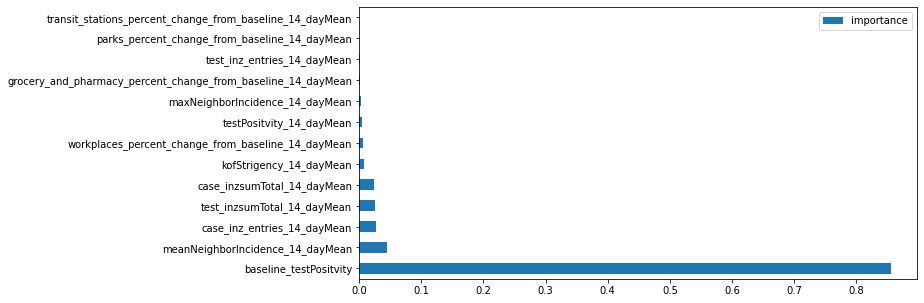

'----------End of evaluating (0.3395547866821289)----------'

In [25]:
start = time.time()
'''
featuresSelection = ['baseline_workplaces_percent_change_from_baseline',
                     'workplaces_percent_change_from_baseline_day_7',
                     'workplaces_percent_change_from_baseline_day_8',
                     'workplaces_percent_change_from_baseline_day_9',
                     'workplaces_percent_change_from_baseline_day_10',
                     'workplaces_percent_change_from_baseline_day_11',
                     'workplaces_percent_change_from_baseline_day_12',
                     'workplaces_percent_change_from_baseline_day_13',
                     'isHoliday_14_dayMean',
                     'retail_and_recreation_percent_change_from_baseline_14_dayMean',
                     'grocery_and_pharmacy_percent_change_from_baseline_14_dayMean',
                     'parks_percent_change_from_baseline_14_dayMean',
                     'transit_stations_percent_change_from_baseline_14_dayMean',
                     'workplaces_percent_change_from_baseline_14_dayMean',
                     'residential_percent_change_from_baseline_14_dayMean',
                     'intervistaMob_14_dayMean',
                     'temp_min_14_dayMean',
                     'temp_max_14_dayMean']
labe = 'workplaces_percent_change_from_baseline'
'''
featuresSelection = ['baseline_testPositvity','case_inzsumTotal_14_dayMean','test_inz_entries_14_dayMean',
                     'test_inzsumTotal_14_dayMean','testPositvity_14_dayMean',
                     'retail_and_recreation_percent_change_from_baseline_14_dayMean',
                     'grocery_and_pharmacy_percent_change_from_baseline_14_dayMean',
                     'parks_percent_change_from_baseline_14_dayMean',
                     'transit_stations_percent_change_from_baseline_14_dayMean',
                     'workplaces_percent_change_from_baseline_14_dayMean',
                     'residential_percent_change_from_baseline_14_dayMean',
                     'meanNeighborIncidence_14_dayMean',
                     'maxNeighborIncidence_14_dayMean',
                     'kofStrigency_14_dayMean',
                     'case_inz_entries_14_dayMean']
label = 'testPositvity'


display("---XGBoost---"+label+"---")
reg = xgb.XGBRegressor(n_estimators=100, reg_alpha=200) #reg_lambda=10
display(reg)
reg.fit(pip.fit_transform(train_features[featuresSelection].values), train_labels[label])
predictions_valid1 = reg.predict(pip.fit_transform(validation1_features[featuresSelection].values))
predictions_valid2 = reg.predict(pip.fit_transform(validation2_features[featuresSelection].values))
rmse1 = np.sqrt(mean_squared_error(predictions_valid1, validation1_labels[[label]]))
rmse2 = np.sqrt(mean_squared_error(predictions_valid2, validation2_labels[[label]]))
baseline_rmse1 = np.sqrt(mean_squared_error(validation1_features[["baseline_"+label]],validation1_labels[[label]]))
baseline_rmse2 = np.sqrt(mean_squared_error(validation2_features[["baseline_"+label]],validation2_labels[[label]]))
display("Baseline RMSE validation set 1: "+str(baseline_rmse1))
display("Model RMSE validation set 1: "+str(rmse1))
display("Baseline RMSE validation set 2: "+str(baseline_rmse2))
display("Model RMSE validation set 2: "+str(rmse2))
df = pd.DataFrame(reg.feature_importances_, index=featuresSelection, columns=['importance']).sort_values(['importance'], ascending=False)
display(df[df['importance'] > 0].iloc[0:30].plot(kind='barh', y='importance', figsize=(10,5)))  
plt.show()
    
display("----------End of evaluating (%s)----------" % (time.time() - start))

'---RandomForestRegressor---workplaces_percent_change_from_baseline---'

RandomForestRegressor()

'Baseline RMSE validation set 1: 4.921673003924303'

'Model RMSE validation set 1: 6.27216709217137'

'Baseline RMSE validation set 2: 10.615032028550798'

'Model RMSE validation set 2: 6.063895240463557'

<AxesSubplot:>

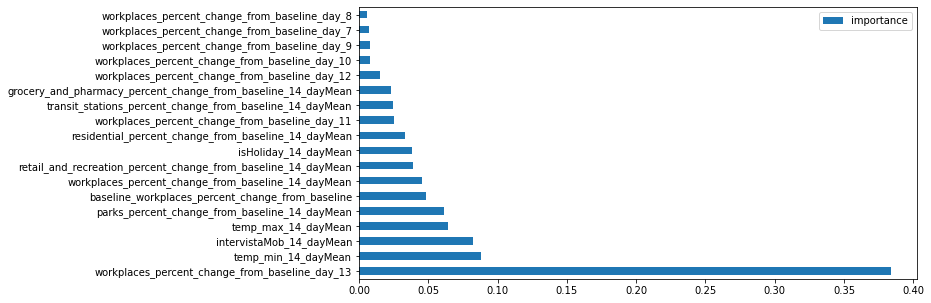

'----------End of evaluating (6.327197313308716)----------'

In [10]:
start = time.time()

featuresSelection = ['baseline_workplaces_percent_change_from_baseline',
                     'workplaces_percent_change_from_baseline_day_7',
                     'workplaces_percent_change_from_baseline_day_8',
                     'workplaces_percent_change_from_baseline_day_9',
                     'workplaces_percent_change_from_baseline_day_10',
                     'workplaces_percent_change_from_baseline_day_11',
                     'workplaces_percent_change_from_baseline_day_12',
                     'workplaces_percent_change_from_baseline_day_13',
                     'isHoliday_14_dayMean',
                     'retail_and_recreation_percent_change_from_baseline_14_dayMean',
                     'grocery_and_pharmacy_percent_change_from_baseline_14_dayMean',
                     'parks_percent_change_from_baseline_14_dayMean',
                     'transit_stations_percent_change_from_baseline_14_dayMean',
                     'workplaces_percent_change_from_baseline_14_dayMean',
                     'residential_percent_change_from_baseline_14_dayMean',
                     'intervistaMob_14_dayMean',
                     'temp_min_14_dayMean',
                     'temp_max_14_dayMean']

for label in ['workplaces_percent_change_from_baseline']:
    display("---RandomForestRegressor---"+label+"---")
    reg = RandomForestRegressor() #reg_lambda=10
    display(reg)
    reg.fit(pip.fit_transform(train_features[featuresSelection].values), train_labels[label])
    predictions_valid1 = reg.predict(pip.fit_transform(validation1_features[featuresSelection].values))
    predictions_valid2 = reg.predict(pip.fit_transform(validation2_features[featuresSelection].values))
    rmse1 = np.sqrt(mean_squared_error(predictions_valid1, validation1_labels[[label]]))
    rmse2 = np.sqrt(mean_squared_error(predictions_valid2, validation2_labels[[label]]))
    baseline_rmse1 = np.sqrt(mean_squared_error(validation1_features[["baseline_"+label]],validation1_labels[[label]]))
    baseline_rmse2 = np.sqrt(mean_squared_error(validation2_features[["baseline_"+label]],validation2_labels[[label]]))
    display("Baseline RMSE validation set 1: "+str(baseline_rmse1))
    display("Model RMSE validation set 1: "+str(rmse1))
    display("Baseline RMSE validation set 2: "+str(baseline_rmse2))
    display("Model RMSE validation set 2: "+str(rmse2))
    df = pd.DataFrame(reg.feature_importances_, index=featuresSelection, columns=['importance']).sort_values(['importance'], ascending=False)
    display(df[df['importance'] > 0].iloc[0:30].plot(kind='barh', y='importance', figsize=(10,5)))  
    plt.show()
    
display("----------End of evaluating (%s)----------" % (time.time() - start))

    

In [12]:
start = time.time()

featuresSelection = ['baseline_workplaces_percent_change_from_baseline',
                     'workplaces_percent_change_from_baseline_day_11',
                     'workplaces_percent_change_from_baseline_day_12',
                     'workplaces_percent_change_from_baseline_day_13',
                     'workplaces_percent_change_from_baseline_14_dayMean']

for label in ['workplaces_percent_change_from_baseline']:
    display("---MLP---"+label+"---")
    reg = MLPRegressor(hidden_layer_sizes=(10,10), alpha=10, max_iter=1000) # , max_iter=1000
    display(reg)
    reg.fit(pip.fit_transform(train_features[featuresSelection].values), train_labels[label])
    predictions_valid1 = reg.predict(pip.fit_transform(validation1_features[featuresSelection].values))
    predictions_valid2 = reg.predict(pip.fit_transform(validation2_features[featuresSelection].values))
    rmse1 = np.sqrt(mean_squared_error(predictions_valid1, validation1_labels[[label]]))
    rmse2 = np.sqrt(mean_squared_error(predictions_valid2, validation2_labels[[label]]))
    baseline_rmse1 = np.sqrt(mean_squared_error(validation1_features[["baseline_"+label]],validation1_labels[[label]]))
    baseline_rmse2 = np.sqrt(mean_squared_error(validation2_features[["baseline_"+label]],validation2_labels[[label]]))
    display("Baseline RMSE validation set 1: "+str(baseline_rmse1))
    display("Model RMSE validation set 1: "+str(rmse1))
    display("Baseline RMSE validation set 2: "+str(baseline_rmse2))
    display("Model RMSE validation set 2: "+str(rmse2))
    
display("----------End of evaluating (%s)----------" % (time.time() - start))

'---MLP---workplaces_percent_change_from_baseline---'

MLPRegressor(alpha=10, hidden_layer_sizes=(10, 10), max_iter=1000)

'Baseline RMSE validation set 1: 4.921673003924303'

'Model RMSE validation set 1: 4.421124985897147'

'Baseline RMSE validation set 2: 10.615032028550798'

'Model RMSE validation set 2: 8.33817141893823'

'----------End of evaluating (9.725636720657349)----------'

In [14]:
start = time.time()

featuresSelection = ['baseline_workplaces_percent_change_from_baseline',
                     'workplaces_percent_change_from_baseline_day_7',
                     'workplaces_percent_change_from_baseline_day_8',
                     'workplaces_percent_change_from_baseline_day_9',
                     'workplaces_percent_change_from_baseline_day_10',
                     'workplaces_percent_change_from_baseline_day_11',
                     'workplaces_percent_change_from_baseline_day_12',
                     'workplaces_percent_change_from_baseline_day_13',
                     'isHoliday_14_dayMean',
                     'retail_and_recreation_percent_change_from_baseline_14_dayMean',
                     'grocery_and_pharmacy_percent_change_from_baseline_14_dayMean',
                     'parks_percent_change_from_baseline_14_dayMean',
                     'transit_stations_percent_change_from_baseline_14_dayMean',
                     'workplaces_percent_change_from_baseline_14_dayMean',
                     'residential_percent_change_from_baseline_14_dayMean',
                     'intervistaMob_14_dayMean',
                     'temp_min_14_dayMean',
                     'temp_max_14_dayMean']

for label in ['workplaces_percent_change_from_baseline']:
    display("---SVR---"+label+"---")
    reg = svm.SVR() #reg_lambda=10
    display(reg)
    reg.fit(pip.fit_transform(train_features[featuresSelection].values), train_labels[label])
    predictions_valid1 = reg.predict(pip.fit_transform(validation1_features[featuresSelection].values))
    predictions_valid2 = reg.predict(pip.fit_transform(validation2_features[featuresSelection].values))
    rmse1 = np.sqrt(mean_squared_error(predictions_valid1, validation1_labels[[label]]))
    rmse2 = np.sqrt(mean_squared_error(predictions_valid2, validation2_labels[[label]]))
    baseline_rmse1 = np.sqrt(mean_squared_error(validation1_features[["baseline_"+label]],validation1_labels[[label]]))
    baseline_rmse2 = np.sqrt(mean_squared_error(validation2_features[["baseline_"+label]],validation2_labels[[label]]))
    display("Baseline RMSE validation set 1: "+str(baseline_rmse1))
    display("Model RMSE validation set 1: "+str(rmse1))
    display("Baseline RMSE validation set 2: "+str(baseline_rmse2))
    display("Model RMSE validation set 2: "+str(rmse2))
    
display("----------End of evaluating (%s)----------" % (time.time() - start))


'---SVR---workplaces_percent_change_from_baseline---'

SVR()

'Baseline RMSE validation set 1: 4.921673003924303'

'Model RMSE validation set 1: 4.59207388711593'

'Baseline RMSE validation set 2: 10.615032028550798'

'Model RMSE validation set 2: 6.485336426979015'

'----------End of evaluating (2.6166269779205322)----------'